In [1]:
from typing import Dict,Callable
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [7]:
def initializer(data: np.ndarray, k_cluster: int) -> np.ndarray:
    """Método para inicializar o kmeans. Aqui seguimos a estratégia do algoritmo Random partition.
    Args:
        data (np.ndarray) : array com os dados a serem analisados
        k_cluster (int) : inteiro com o número de cluster
    Return:
        centers_cluster (np.ndarray) : array com as informações dos centroides dos cluster
    """
    # instance of dicionary
    set_centroids = {}
    # shuffle data for random
    np.random.shuffle(data)
    div = data.shape[0]//k_cluster
    # array with position of the center cluster
    centers_cluster = np.ndarray((k_cluster,data.shape[1]))
    # group the points by random clusters
    for index in range(k_cluster):
        set_centroids[index] = data[index*div:(index+1)*div,:]
    # take the mean value per cluster
    for idx,value in set_centroids.items():
        centers_cluster[idx] = np.mean(value,axis=0)
    return centers_cluster
    

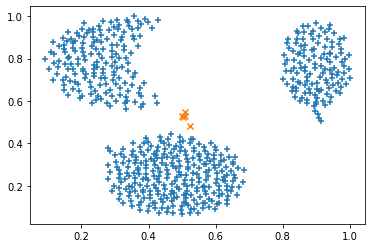

In [34]:
# teste
data = np.loadtxt('cluster.dat')
data_norm = data/data.max(axis=0)
cluster_centers_norm = initializer(data=data_norm,k_cluster=5)
plt.scatter(data_norm[:,0],data_norm[:,1],marker='+')
plt.scatter(cluster_centers_norm[:,0],cluster_centers_norm[:,1],marker='x')
plt.show()

In [9]:
def k_means(data: np.ndarray, k_clusters_centers: int) -> np.ndarray:
    """Método de aprendizagem não supervisionado. Através dos dados, o programa aprende a dividir os dados em clusters, definindo um centro para esses clusters.
    Args:
        data (np.ndarray) : Dados que serão utilizados para serem dividos em cluster
        k_cluster_centers (int) : quantidade de cluster
    Return:
        set_centroids (np.ndarray) : array com a posição (coordenada) do centro de cada cluster
    """
    dim = data.shape[1]
    num = data.shape[0]
    # INITIALIZATION - Forgy initialization
    # Random partition as a kmeans initialization
    list_centroids = initializer(data=data,k_cluster=k_clusters_centers)
    flag = True
    # LEARNING PART
    # loop that only stop when the list_centroids is the same the loop_centroids
    while flag:
        new_centroids = np.ndarray((k_clusters_centers,dim))
        # Dictionary: each cluster with a set (actually is a list) of point that belong to him
        set_centroids = assign_to_cluster(data_in=data,center_cluster=list_centroids)
        # for each cluster, we now calculate the new centroid that is a mean value from all points that belong to this cluster.
        for idx,value in set_centroids.items():
            if value.size == 0:
                pass
            else:
                new_centroids[idx] = np.mean(value,axis=0)
        # check if the loop has ended. The loop ends if the new list of centroids is the same from the last iteration
        if np.all(list_centroids==new_centroids):
            flag = False
        # if loop continues, list_centroids receives the new centroids positions
        else:
            list_centroids = new_centroids
    return new_centroids

def assign_to_cluster(data_in: np.ndarray, center_cluster: np.ndarray) -> Dict[int,np.ndarray]:
    """ Com a posição dos centroides dos cluster fornecidos, cada ponto é relacionado a um cluster segundo a sua distancia euclidiana a esses centroides. A menor distancia significa que o ponto pertence a esse mesmo cluster.
    Args:
        data_in (np.ndarray) : Dados que serão utilizados para 
        center_cluster (np.ndarray) : Array com a posição dos centroides dos clusters
    Return:
        set_centroids (Dict[int,np.ndarray]) : dicionário relacionando cada cluster com um array dos pontos que pertencem a ele
    """
    # instance of the dictionary that will return at end of this function
    set_centroids={}
    # for each cluster, create a instance of a list to receive data points
    for i in range(center_cluster.shape[0]):
        set_centroids[i] = []
    # here we need to garantee that the number of feature is the same
    assert center_cluster.shape[1] == data_in.shape[1]
    # for each data position, it's calculated the euclidean distance between him and centroids position. So this elements are added to the cluster that has the shortest distance.
    for element in data_in:
        # array with all euclidean distance between the data point and the clusters centroid.
        dist = np.linalg.norm(center_cluster-element,axis=1)
        # The data point is add to the closest cluster's list
        set_centroids[np.argmin(dist)].append(element.tolist())
    # at end of function, convert list into a np.ndarray
    for center,value in set_centroids.items():
        set_centroids[center] = np.array(value)
    return set_centroids

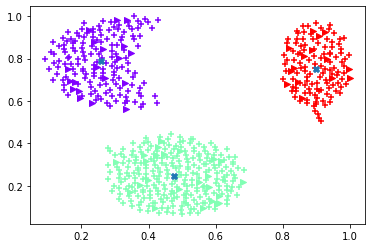

In [30]:
# divisão para dados de treinamento e dados de teste
np.random.shuffle(data_norm)
train_index_norm = int(data_norm.shape[0]*0.9)
train_data_norm,test_data_norm = np.vsplit(data_norm,[train_index_norm])
# função k_means em execução, obtenho um array com o centro dos cluster
cluster_centers_norm = k_means(data=train_data_norm,k_clusters_centers=3)
# array de cores para plotar os resultados
colors = cm.rainbow(np.linspace(0,1,cluster_centers_norm.shape[0]))
# função assign_to_cluster em execução, obtenho um dicionario que aponta para cada cluster, um array dos pontos que pertecem a esse cluster
set_clusters_train_norm = assign_to_cluster(data_in=train_data_norm,center_cluster=cluster_centers_norm)
set_clusters_test_norm = assign_to_cluster(data_in=test_data_norm,center_cluster=cluster_centers_norm)
# Plot dos pontos obtidos, dividindo os pontos em suas cores 
for value,color in zip(set_clusters_train_norm.values(),colors):
    plt.scatter(value[:,0],value[:,1],marker='+',color=color)
for value,color in zip(set_clusters_test_norm.values(),colors):
    plt.scatter(value[:,0],value[:,1],marker='>',color=color)
plt.scatter(cluster_centers_norm[:,0],cluster_centers_norm[:,1],marker='X')
plt.show()

In [31]:
def elbow(fun1: Callable, fun2: Callable, data: np.ndarray) ->  np.ndarray:
    MAX_K_CLUSTER = 10
    sse = np.ndarray((MAX_K_CLUSTER,1))
    for i in range(1,MAX_K_CLUSTER):
        center_cluster = fun1(data,i)
        set_centroids = fun2(data,center_cluster)
        sse[i] = 0
        for index,value in set_centroids.items():
            sse[i] += np.sum(np.linalg.norm(value-center_cluster[index],axis=1)**2)
            
    plt.plot(range(1,MAX_K_CLUSTER),sse[1:,:])
    plt.show()
    return sse[1:,:]

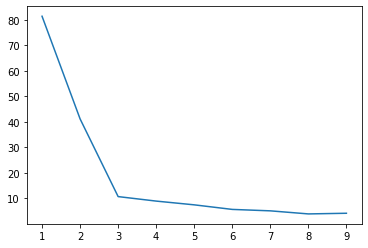

array([[81.36269519],
       [41.16182407],
       [10.73394978],
       [ 8.97138571],
       [ 7.50472635],
       [ 5.71536232],
       [ 5.15306197],
       [ 3.95007001],
       [ 4.20745267]])

In [36]:
elbow(fun1=k_means,fun2=assign_to_cluster,data=data_norm)

In [4]:
a = np.array([[1,2]])
b = np.array([
    [1,3],
    [1,4],
    [1,5]
])

np.max(np.linalg.norm(a-b,axis=1))

3.0